# 🧮 FATALITY INSIGHTS – "Who died and how bad was it?"

This notebook explores the human cost of airplane crashes. This dive deep into fatalities, survivor rates, and the severity of incidents — by analyzing both passenger and crew casualties, as well as ground fatalities.

key questions:
- How deadly were these crashes?
- Were any survivable?
- How often did all lives aboard get lost?
- What patterns emerge from fatality ratios?

Let’s quantify the tragedy behind the statistics.


In [22]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Setup
sns.set(style="whitegrid")
pd.set_option("display.max_columns", None)

# Load dataset
df = pd.read_csv("feature_engineered_crashes.csv")

# Preview
df.head()

,date,time,location,operator,route,ac_type,aboard,aboard_passangers,aboard_crew,fatalities,fatalities_passangers,fatalities_crew,ground,summary,Year,Month,Weekday,Decade,is_Military,Fatality_Rate,Is_Fatal,Aircraft_Type_Simple,Crash_Location_Type
0,1908-09-17,17:18:00,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908,9,Thursday,1900,1,0.5,1,Other,Land
1,1912-07-12,06:30:00,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912,7,Friday,1910,1,1.0,1,Airship,Land
2,1913-08-06,Unknown,"Victoria, British Columbia, Canada",Private,Unknown,Curtiss seaplane,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1913,8,Wednesday,1910,0,1.0,1,Seaplane,Land
3,1913-09-09,18:30:00,Over the North Sea,Military - German Navy,Unknown,Zeppelin L-1 (airship),20.0,0.0,0.0,14.0,0.0,0.0,0.0,The airship flew into a thunderstorm and encou...,1913,9,Tuesday,1910,1,0.7,1,Airship,Water
4,1913-10-17,10:30:00,"Near Johannisthal, Germany",Military - German Navy,Unknown,Zeppelin L-2 (airship),30.0,0.0,0.0,30.0,0.0,0.0,0.0,Hydrogen gas which was being vented was sucked...,1913,10,Friday,1910,1,1.0,1,Airship,Land


16. What’s the average number of people aboard per crash?

Average number of people aboard per crash: 31.20


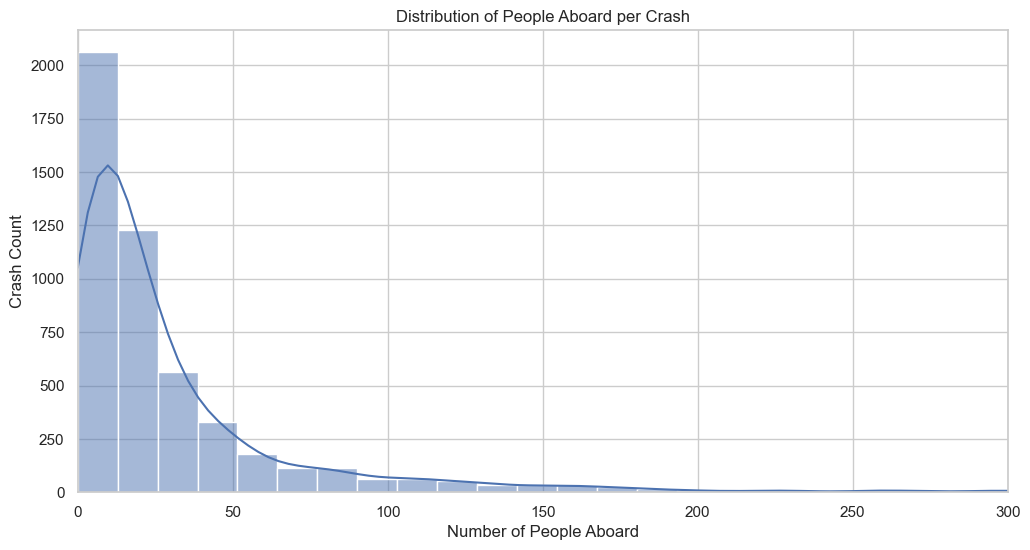

In [23]:
# Q16: Average number of people aboard per crash
avg_aboard = df["aboard"].mean()
print(f"Average number of people aboard per crash: {avg_aboard:.2f}")

# Visualize distribution of people aboard per crash
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.histplot(df["aboard"], bins=50, kde=True)
plt.title("Distribution of People Aboard per Crash")
plt.xlabel("Number of People Aboard")
plt.ylabel("Crash Count")
plt.xlim(0, 300)  # Most data lies below this range
plt.show()

📌 31.20 people on average were aboard in each crash.

- Most crashes involved smaller aircraft, often with fewer than 10–20 people aboard.

- A small number of large commercial crashes skew the average upward.



17. What’s the average number of fatalities per crash?

In [24]:
# Q17: Average number of fatalities per crash
avg_fatalities = df["fatalities"].mean()
print(f"Average number of fatalities per crash: {avg_fatalities:.2f}")

Average number of fatalities per crash: 22.41


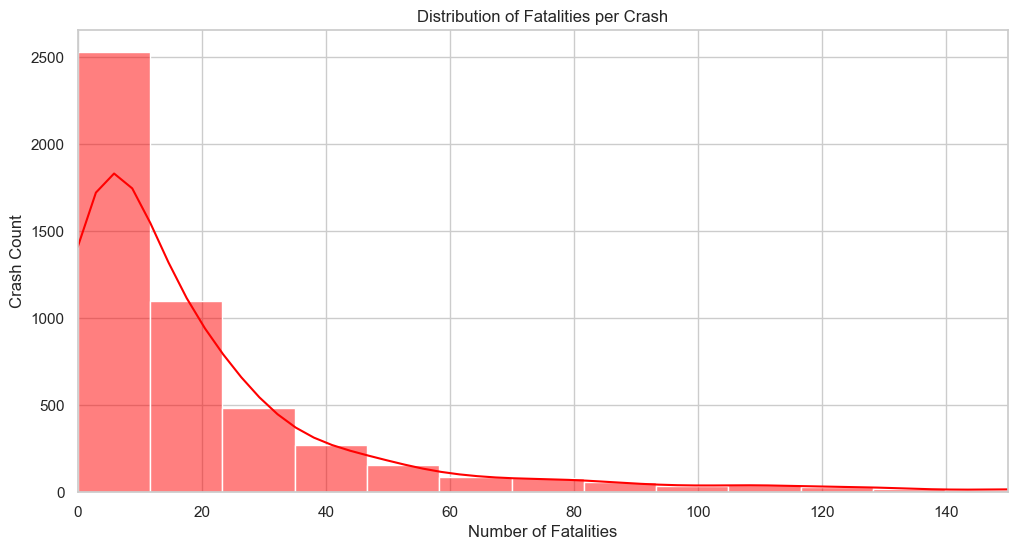

In [25]:
# Visualize the distribution of fatalities
plt.figure(figsize=(12,6))
sns.histplot(df["fatalities"], bins=50, kde=True, color='red')
plt.title("Distribution of Fatalities per Crash")
plt.xlabel("Number of Fatalities")
plt.ylabel("Crash Count")
plt.xlim(0, 150)  # Helps avoid long tail distortion
plt.show()

☠️ **22.41 fatalities** per crash on average.

- Most crashes led to multiple fatalities, especially before the 2000s.
- A majority of these were high-fatality events concentrated in earlier decades.

18. What’s the deadliest crash in the dataset?

In [26]:
# Q18: Deadliest crash in the dataset
deadliest_crash = df[df["fatalities"] == df["fatalities"].max()]
deadliest_crash[[
    "date", "location", "operator", "ac_type", "aboard", "fatalities", "summary"
]]

,date,location,operator,ac_type,aboard,fatalities,summary
2862,1977-03-27,"Tenerife, Canary Islands",Pan American World Airways / KLM,Boeing B-747-121 / Boeing B-747-206B,644.0,583.0,Both aircraft were diverted to Tenerife becaus...


🔥 **Tenerife, Canary Islands (1977)** – **583 deaths**

| Date       | Location                | Operator                             | Aircraft Type                          | Aboard | Fatalities |
|------------|--------------------------|--------------------------------------|----------------------------------------|--------|------------|
| 1977-03-27 | Tenerife, Canary Islands | Pan Am / KLM                         | Boeing B-747-121 & B-747-206B          | 644    | 583        |

- Two jumbo jets collided on the runway in heavy fog — the deadliest aviation accident in history.
- Caused by a mix of miscommunication, procedural failures, and tragic timing.

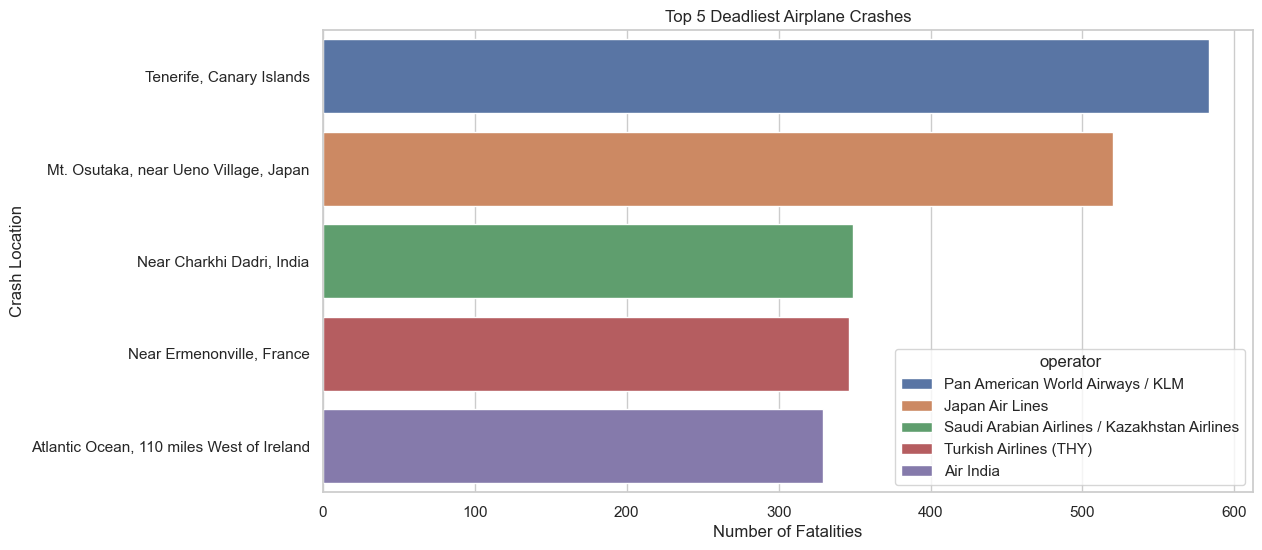

In [27]:
# bar plot for visual reference (top 5 deadliest crashes)
top5_deadliest = df.sort_values(by="fatalities", ascending=False).head(5)
plt.figure(figsize=(12,6))
sns.barplot(x="fatalities", y="location", data=top5_deadliest, hue="operator", dodge=False)
plt.title("Top 5 Deadliest Airplane Crashes")
plt.xlabel("Number of Fatalities")
plt.ylabel("Crash Location")
plt.show()


19. How often do crashes kill all passengers/crew?

In [28]:
# Q19: Count of crashes with 100% fatalities (all aboard killed)
# Note: Exclude cases with aboard = 0 to avoid divide-by-zero
df_nonzero_aboard = df[df["aboard"] > 0]
fully_fatal_crashes = df_nonzero_aboard[df_nonzero_aboard["fatalities"] == df_nonzero_aboard["aboard"]]

# Count and percentage
total_crashes = len(df_nonzero_aboard)
fully_fatal_count = len(fully_fatal_crashes)
fully_fatal_percent = round((fully_fatal_count / total_crashes) * 100, 2)

print(f"Crashes with all people aboard killed: {fully_fatal_count} out of {total_crashes} ({fully_fatal_percent}%)")


Crashes with all people aboard killed: 3162 out of 4952 (63.85%)


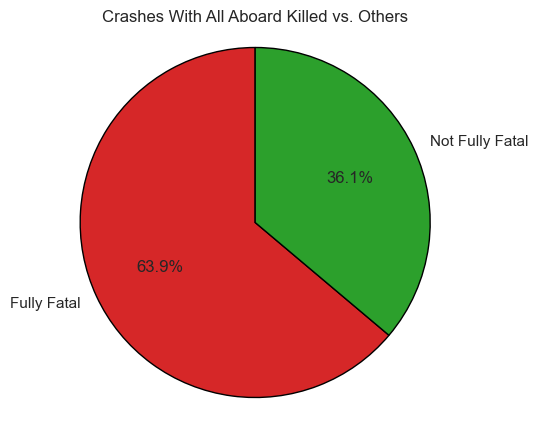

In [29]:
# Plot: Survival vs. Fully Fatal crashes
plt.figure(figsize=(6, 5))
labels = ['Fully Fatal', 'Not Fully Fatal']
counts = [fully_fatal_count, total_crashes - fully_fatal_count]
colors = ['#D62728', '#2CA02C']

plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title("Crashes With All Aboard Killed vs. Others")
plt.axis('equal')
plt.show()


☠️ **3162 of 4952 crashes** (~63.85%) resulted in **total fatalities**.

- Aviation crashes are often not survivable.
- However, ~36.1% of crashes had at least one survivor.


20. How many crashes had zero fatalities?

In [30]:
# Q20: Count crashes with zero fatalities
zero_fatal_crashes = df[df["fatalities"] == 0]
zero_fatal_count = len(zero_fatal_crashes)
total_crashes = len(df)
zero_fatal_percent = round((zero_fatal_count / total_crashes) * 100, 2)

print(f"Crashes with zero fatalities: {zero_fatal_count} out of {total_crashes} ({zero_fatal_percent}%)")


Crashes with zero fatalities: 81 out of 4972 (1.63%)


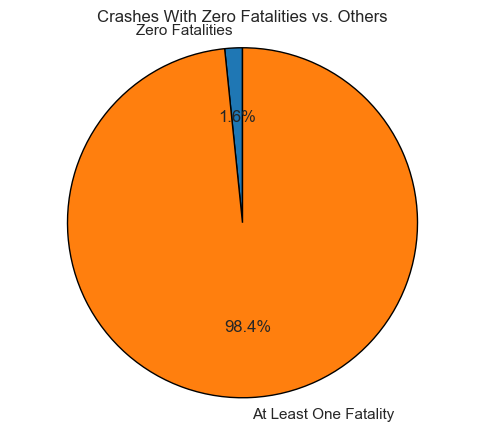

In [31]:
# Plot: Zero Fatalities vs. Fatalities
plt.figure(figsize=(6, 5))
labels = ['Zero Fatalities', 'At Least One Fatality']
counts = [zero_fatal_count, total_crashes - zero_fatal_count]
colors = ['#1F77B4', '#FF7F0E']

plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title("Crashes With Zero Fatalities vs. Others")
plt.axis('equal')
plt.show()


✅ **81 crashes** (~1.63%) were **non-fatal**.

- These were rare and often involved skilled landings or system failures that didn’t result in casualties.

 21. What’s the ratio of fatalities:aboard per year?

In [32]:
# Q21: Calculate annual fatality-to-aboard ratio
annual_stats = df.groupby("Year")[["fatalities", "aboard"]].sum()
annual_stats = annual_stats[annual_stats["aboard"] > 0]  # Avoid divide-by-zero
annual_stats["Fatality_Ratio"] = (annual_stats["fatalities"] / annual_stats["aboard"]).round(3)

# Display sample years
annual_stats["Fatality_Ratio"].tail(15)


Year
2009    0.670
2010    0.711
2011    0.731
2012    0.845
2013    0.367
2014    0.971
2015    0.953
2016    0.570
2017    0.871
2018    0.697
2019    0.706
2020    0.505
2021    0.749
2022    0.589
2023    1.000
Name: Fatality_Ratio, dtype: float64

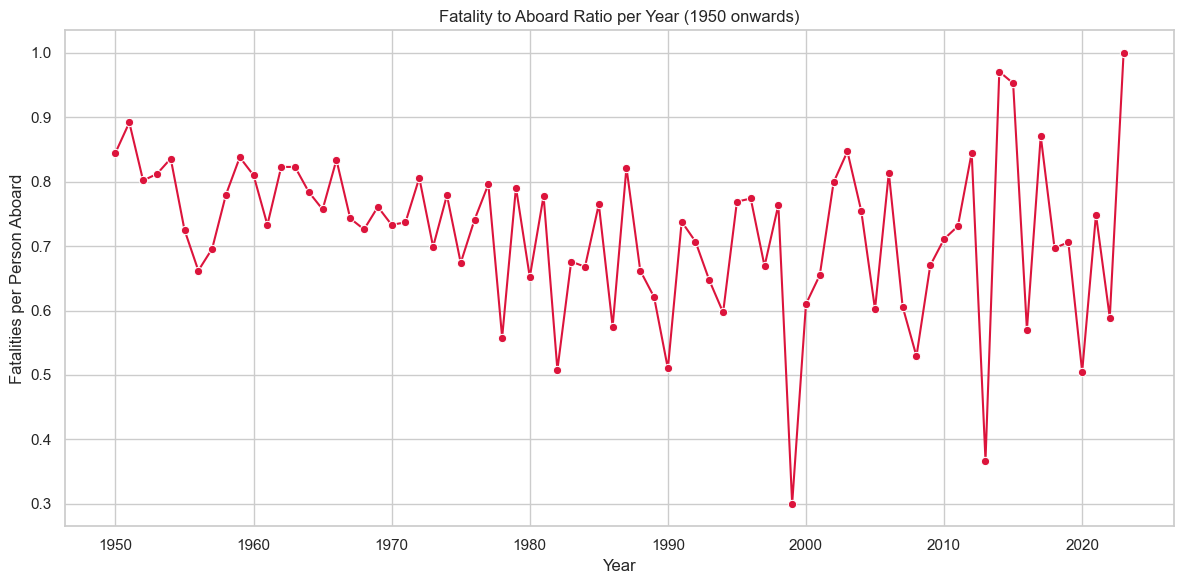

In [33]:
# Plot fatality ratio per year (filtered for post-1950)
plt.figure(figsize=(12, 6))
filtered_stats = annual_stats[annual_stats.index >= 1950]

sns.lineplot(data=filtered_stats, x=filtered_stats.index, y="Fatality_Ratio", marker="o", color="crimson")
plt.title("Fatality to Aboard Ratio per Year (1950 onwards)")
plt.xlabel("Year")
plt.ylabel("Fatalities per Person Aboard")
plt.grid(True)
plt.tight_layout()
plt.show()


- Some years like **2023** had fewer crashes but extremely high fatality rates — every crash was fatal.
- In contrast, **2013** had more survivable incidents.

22. Are passenger or crew fatalities more common?

In [34]:
# Q22: Total fatalities by type
passenger_fatalities = df["fatalities_passangers"].sum()
crew_fatalities = df["fatalities_crew"].sum()

print(f"Total passenger fatalities: {int(passenger_fatalities)}")
print(f"Total crew fatalities: {int(crew_fatalities)}")

Total passenger fatalities: 90574
Total crew fatalities: 16984


- Passenger fatalities dominate, but crew casualties are still significant.
- Suggests many crashes happened in operational flights rather than just training or test flights.


23. How many crashes killed people on the ground? 

In [36]:
# Total crashes with ground fatalities
ground_fatal_crashes = df[df["ground"] > 0].shape[0]
print(f"Total crashes with ground fatalities: {ground_fatal_crashes}")


Total crashes with ground fatalities: 241


### 🧮 Fatality Insights Summary

- ✈️ Average number of people aboard per crash: **31.20**
- ☠️ Average fatalities per crash: **22.41**
- 🔥 Deadliest crash: **Tenerife (1977)** – 583 people killed in a runway collision between two Boeing 747s.
- 💀 Total-fatal crashes (no survivors): **63.85%** of all crashes (3162/4952)
- ✅ Zero-fatality crashes: only **1.63%** (81/4972)
- 📈 Recent years show mixed fatality ratios, with **2023 having a 100% fatality rate** across recorded crashes.
- 👥 Passenger deaths far outnumber crew deaths (90k vs 17k), but both groups are heavily affected.
- 🏚️ 241 crashes also killed **people on the ground**, highlighting wider public risk in aviation disasters.

🧩 Next: We’ll look at **aircraft types, operators, and crash locations** — which planes crash the most, and where.
